### Урок 2. Масштабирование признаков. L1- и L2-регуляризация. Стохастический градиентный спуск

#### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

##### Генерируем датасет при помощи sklearn.datasets.make_regression

In [124]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [125]:
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [126]:
data

array([[-2.75161769e-01,  3.88051923e-01],
       [-7.39931870e-01,  6.41540019e-01],
       [ 1.73259956e+00,  1.38746003e+00],
       ...,
       [ 9.95690738e-02,  1.14050425e+00],
       [ 5.72821025e-01, -1.62061166e-03],
       [-8.10975181e-01, -7.90286210e-01]])

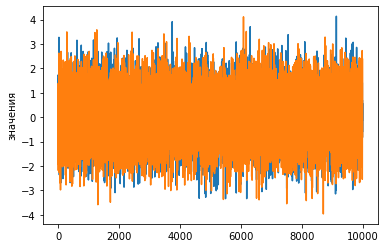

In [127]:
plt.plot(data)
plt.ylabel('значения')
plt.show()

##### Обучаем линейную модель при помощи градиентного спуска

In [128]:
n_features = 2
n_objects = 10000

# вычислим Y с добавлением случайного шума
Y = data.dot(w_true) + np.random.normal(0, 0.5, size=(n_objects))

# сгенерируем вектор истинных весов
w_true = np.random.normal(size=(n_features, ))

# возьмем нулевые начальные веса
w = np.zeros(n_features)

In [129]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(data, w, y_pred):
    y = data.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [130]:
# Реализуем функцию, вычисляющую вектор весов по нормальному уравнению линейной регрессии, и применим ее.
def normal_equation(data, y):
    return np.linalg.solve((data.T).dot(data), (data.T).dot(y))

normal_eq_w = normal_equation(data, Y)
print(f'В случае использования нормального уравнения функционал ошибки составляет {round(mserror(data, normal_eq_w, Y), 4)}')

В случае использования нормального уравнения функционал ошибки составляет 0.2468


In [131]:
# Обучим линейную регрессию путем градиентного спуска и получим графики изменения весов и ошибки

# список векторов весов после каждой итерации
w_list = [w.copy()]

# список значений ошибок после каждой итерации
errors = []

# шаг градиентного спуска
eta = 0.1

# максимальное число итераций
max_iter = 1e4

# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8

# зададим начальную разницу весов большим числом
weight_dist = np.inf

# счетчик итераций
iter_num = 0

# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    new_w = w - 2 * eta * np.dot(data.T, (np.dot(data, w) - Y)) / Y.shape[0]
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors.append(mserror(data, new_w, Y))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)

print(data.shape, w.shape)

(10000, 2) (2,)


Text(0, 0.5, 'MSE')

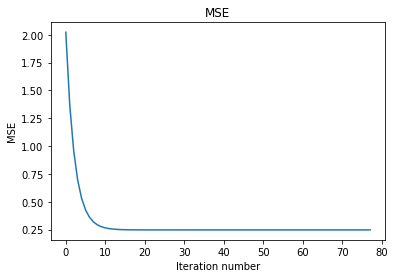

In [132]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

##### Обучаем линейную модель при помощи стохастического градиентного спуска.

In [133]:
# инициализируем начальный вектор весов
w = np.zeros(2)
 
# список векторов весов после каждой итерации
w_list = [w.copy()]
 
# список значений ошибок после каждой итерации
errors_stohastic = []
 
# шаг градиентного спуска
eta = 0.5
 
# максимальное число итераций
max_iter = 1e5
 
# критерий сходимости (разница весов, при которой алгоритм останавливается)
min_weight_dist = 1e-8
 
# зададим начальную разницу весов большим числом
weight_dist = np.inf
 
# счетчик итераций
iter_num = 0
 
np.random.seed(1234)
 
# ход градиентного спуска
while weight_dist > min_weight_dist and iter_num < max_iter:
    
    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(data.shape[0])
    
    new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append(new_w.copy())
    errors_stohastic.append(mserror(data, new_w, target))
    
    iter_num += 1
    w = new_w
    
w_list = np.array(w_list)
 
print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

В случае использования стохастического градиентного спуска функционал ошибки составляет 0.2468


Text(0, 0.5, 'MSE')

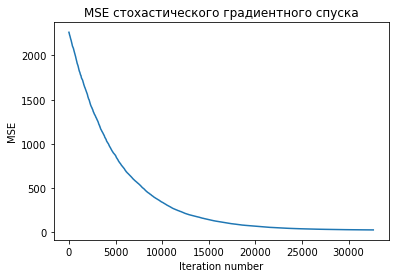

In [141]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_stohastic)), errors_stohastic)
plt.title('MSE стохастического градиентного спуска')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

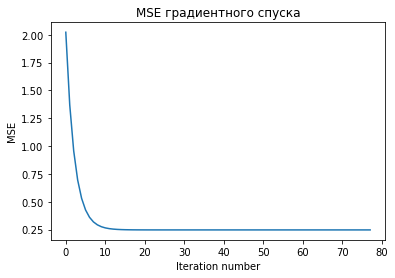

In [142]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors)
plt.title('MSE градиентного спуска')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE')

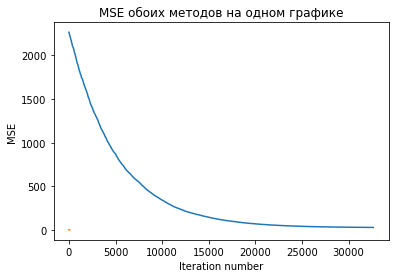

In [143]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_stohastic)), errors_stohastic)
plt.plot(range(len(errors)), errors)
plt.title('MSE обоих методов на одном графике')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

##### ВЫВОД: Скорость сходимости градиентного спуска на 2 порядка выше чем у стохастического градиентного спуска. В первом случае понадобилось около 10-15 итераций во втором более 30000 итераций. На совместном графике сходимость MSE метода градиентного спуска выглядит как оранжевая точка.

#### 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов).

In [154]:
def calc_mse(y, y_pred):
    y = data.dot(w)
    err = np.mean((y - y_pred)**2)
    return err

In [155]:
# функция реализующая L2 регуляризацию
def eval_model_reg_L2(data, y, iterations, alpha=1e-4, lambda_=1e-8, print_=1):
    np.random.seed(42)
    W = np.random.randn(data.shape[0])
    n = data.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, data)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), data.T) + lambda_ * W)
        if i % (iterations / 10) == 0:
            if print_>0:
                print(i, W, err, lambda_)
    return W

#### 3 [опция]. Модернизировать решение задания 2, заменив L2 регуляризацию на L1 регуляризацию.

In [ ]:
# функция реализующая L1 регуляризацию
def eval_model_reg_L1(data, y, iterations, alpha=1e-4, lambda_=1e-8):
    np.random.seed(42)
    W = np.random.randn(data.shape[0])
    n = data.shape[1]
    for i in range(1, iterations+1):
        y_pred = np.dot(W, data)
        err = calc_mse(y, y_pred)
        W -= alpha * (1/n * 2 * np.dot((y_pred - y), data.T) + lambda_ /2 * W/abs(W))
    return W